In [ ]:
# !python3 -m pip install ipykernel -U --user --force-reinstall
# !pip install matplotlib
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install catboost
# !pip install scikit-learn
# !pip install xgboost

     |████████████████████████████████| 255.9 MB 49 kB/s s eta 0:00:01     |█████████████████               | 135.4 MB 68.4 MB/s eta 0:00:02


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import sklearn

In [ ]:
def age_map(x: int) -> int:
    x = int(x)
    if x < 20:
        return 1
    elif x >= 20 and x < 30:
        return 2
    elif x >= 30 and x < 40:
        return 3
    elif x >= 40 and x < 50:
        return 4
    elif x >= 50 and x < 60:
        return 5
    else:
        return 6

/tmp/ipykernel_21228/3042752156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fff['age_'] = fff['age'].fillna(int(fff['age'].mean()))
/tmp/ipykernel_21228/3042752156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fff['age_'] = fff['age_'].apply(age_map)


<AxesSubplot: xlabel='category'>

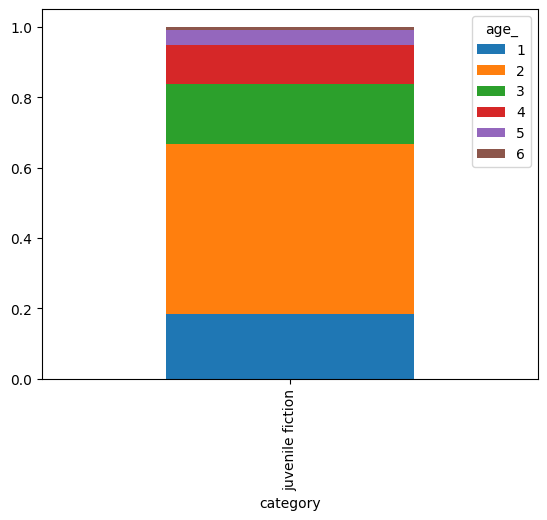

In [ ]:
fff = data.loc[data['category']=='juvenile fiction']
fff['age_'] = fff['age'].fillna(int(fff['age'].mean()))
fff['age_'] = fff['age_'].apply(age_map)
table = pd.crosstab(fff['category'], fff['age_'], normalize = 'index')
table.plot.bar(stacked=True)

In [ ]:
path = "./data/"
book = pd.read_csv(path+"books.csv")
users = pd.read_csv(path+"users.csv")
train_ratings = pd.read_csv(path+"train_ratings.csv")

In [ ]:
data = pd.merge(pd.merge(book, train_ratings, on="isbn"), users, on="user_id")
data

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating,location,age
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,en,['Actresses'],"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",images/0002005018.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,en,['Fiction'],"Now back in print, Ann Beattie&#39;s finest short story collection,\nreissued to accompany the publication of her latest novel, &quot;The\nDoctor&#39;s House.",images/074322678X.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg,8,6,"timmins, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306790,0446608831,Texas Crime Chronicles,Texas Monthly,2000.0,Warner Books,http://images.amazon.com/images/P/0446608831.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0446608831.01.THUMBZZZ.jpg,278411,8,"stratford, texas, usa",54.0
306791,1550390961,"Gilean Douglas: Writing Nature, Finding Home",Andrea Pinto Lebowitz,1999.0,Sono Nis Press,http://images.amazon.com/images/P/1550390961.01.THUMBZZZ.jpg,en,"['Authors, Canadian (English) 20th century Biography']",Her writings span almost the entire twentieth century. This book both\nan intriguing biography and a collection of Douglas&#39;s best\nwriting.,images/1550390961.01.THUMBZZZ.jpg,278621,8,"victoria, delaware, canada",74.0
306792,0375507299,The Snow Geese: A Story of Home,William Fiennes,2002.0,Random House,http://images.amazon.com/images/P/0375507299.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0375507299.01.THUMBZZZ.jpg,278636,2,"irvington, alabama, usa",NaN
306793,0345330293,Town Like Alice,Nevil Shute,1981.0,Ballantine Books,http://images.amazon.com/images/P/0345330293.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0345330293.01.THUMBZZZ.jpg,278659,10,"vancouver, washington, usa",33.0


In [ ]:
data["location_city"] = data["location"].apply(lambda x : x.split(',')[0])
data["location_state"] = data["location"].apply(lambda x : x.split(',')[1])
data["location_country"] =  data["location"].apply(lambda x : x.split(',')[2])

In [ ]:
data

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating,location,age,location_city,location_state,location_country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,en,['Actresses'],"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",images/0002005018.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN,timmins,ontario,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,en,['Fiction'],"Now back in print, Ann Beattie&#39;s finest short story collection,\nreissued to accompany the publication of her latest novel, &quot;The\nDoctor&#39;s House.",images/074322678X.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN,timmins,ontario,canada
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN,timmins,ontario,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg,8,6,"timmins, ontario, canada",NaN,timmins,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306790,0446608831,Texas Crime Chronicles,Texas Monthly,2000.0,Warner Books,http://images.amazon.com/images/P/0446608831.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0446608831.01.THUMBZZZ.jpg,278411,8,"stratford, texas, usa",54.0,stratford,texas,usa
306791,1550390961,"Gilean Douglas: Writing Nature, Finding Home",Andrea Pinto Lebowitz,1999.0,Sono Nis Press,http://images.amazon.com/images/P/1550390961.01.THUMBZZZ.jpg,en,"['Authors, Canadian (English) 20th century Biography']",Her writings span almost the entire twentieth century. This book both\nan intriguing biography and a collection of Douglas&#39;s best\nwriting.,images/1550390961.01.THUMBZZZ.jpg,278621,8,"victoria, delaware, canada",74.0,victoria,delaware,canada
306792,0375507299,The Snow Geese: A Story of Home,William Fiennes,2002.0,Random House,http://images.amazon.com/images/P/0375507299.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0375507299.01.THUMBZZZ.jpg,278636,2,"irvington, alabama, usa",NaN,irvington,alabama,usa
306793,0345330293,Town Like Alice,Nevil Shute,1981.0,Ballantine Books,http://images.amazon.com/images/P/0345330293.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0345330293.01.THUMBZZZ.jpg,278659,10,"vancouver, washington, usa",33.0,vancouver,washington,usa


### 단변량분석

#### Data info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306795 entries, 0 to 306794
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 306795 non-null  object 
 1   book_title           306795 non-null  object 
 2   book_author          306795 non-null  object 
 3   year_of_publication  306795 non-null  float64
 4   publisher            306795 non-null  object 
 5   img_url              306795 non-null  object 
 6   language             187711 non-null  object 
 7   category             185574 non-null  object 
 8   summary              187711 non-null  object 
 9   img_path             306795 non-null  object 
 10  user_id              306795 non-null  int64  
 11  rating               306795 non-null  int64  
 12  location             306795 non-null  object 
 13  age                  214133 non-null  float64
 14  location_city        306795 non-null  object 
 15  location_state   

language, category, summary, age에 결측치가 존재함


In [ ]:
data.describe()

,year_of_publication,user_id,rating,age
count,306795.000000,306795.000000,306795.000000,214133.000000
mean,1995.675255,136128.416099,7.069714,36.662462
std,7.412889,80512.194379,2.433217,12.282089
min,1376.000000,8.000000,1.000000,5.000000
25%,1993.000000,67591.000000,6.000000,28.000000
50%,1997.000000,134076.000000,8.000000,35.000000
75%,2001.000000,206438.000000,9.000000,45.000000
max,2005.000000,278854.000000,10.000000,99.000000


In [ ]:
def missing_info(data, col):
    print(data[col].isna().sum())
    print(data[col].value_counts() / data.shape[0]) # NAN 포함된 건수 비율
    print(data[col].value_counts() / data[col].count()) # NAN 미포함 건수 비율

#### isbn

In [ ]:
column = 'isbn'

In [ ]:
data[column].value_counts()

0316666343    566
0971880107    465
0385504209    390
0312195516    307
0060928336    256
             ... 
0679312544    1  
067903515X    1  
0676973787    1  
0618031685    1  
0670528951    1  
Name: isbn, Length: 129777, dtype: int64

In [ ]:
data['language'].unique()

array(['en', nan, 'es', 'ru', 'fr', 'de', 'it', 'nl', 'da', 'ca', 'pt',
       'la', 'vi', 'no', 'eo', 'ko', 'zh-CN', 'ga', 'fa', 'ja', 'el',
       'ms', 'ro', 'zh-TW', 'gl'], dtype=object)

In [ ]:
test_ratings = pd.read_csv(path+"test_ratings.csv")
data2 = pd.merge(pd.merge(book, test_ratings, on="isbn", how='right'), users, on="user_id", how='left')
total = pd.concat([data, data2], axis=0)
total

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating,location,age,location_city,location_state,location_country,new_category
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,harperflamingo canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,en,actresses,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",images/0002005018.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN,timmins,ontario,canada,72.0
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,en,fiction,"Now back in print, Ann Beattie&#39;s finest short story collection,\nreissued to accompany the publication of her latest novel, &quot;The\nDoctor&#39;s House.",images/074322678X.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN,timmins,ontario,canada,38.0
2,0887841740,The Middle Stories,Sheila Heti,2004.0,house of anansi press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,NaN,NaN,The Middle Stories,images/0887841740.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN,timmins,ontario,canada,38.0
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,mira books,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg,NaN,NaN,Jane Doe,images/1552041778.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN,timmins,ontario,canada,47.0
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,brilliance audio - trade,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg,NaN,NaN,The Witchfinder (Amos Walker Mystery Series),images/1567407781.01.THUMBZZZ.jpg,8,6,"timmins, ontario, canada",NaN,timmins,ontario,canada,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76694,1576734218,On Becoming Childwise,Gary Ezzo,1999.0,Multnomah,http://images.amazon.com/images/P/1576734218.01.THUMBZZZ.jpg,en,['Family & Relationships'],"On Becoming Childwise responds to this need by offering sound,\nbiblical instruction for parents with questions about discipline,\nparent roles, and other issues.",images/1576734218.01.THUMBZZZ.jpg,278543,0,"valenica, california, usa",39.0,NaN,NaN,NaN,NaN
76695,3492223710,Michael KÃ¶hlmeiers Sagen des klassischen Altertums (Serie Piper),Michael KÃ¶hlmeier,1996.0,Piper,http://images.amazon.com/images/P/3492223710.01.THUMBZZZ.jpg,de,"['Mythology, Classical']","Respektlos macht der Autor mit der griechischen Sagenwelt bekannt: all\ndie oft grausamen, erschütternden und bewegenden Geschichten - auf\nlockere Art neu erzählt.",images/3492223710.01.THUMBZZZ.jpg,278563,0,"wien, wien, austria",37.0,NaN,NaN,NaN,NaN
76696,1896095186,Pool-Hopping,Anne Fleming,2000.0,Polestar Book Publishers,http://images.amazon.com/images/P/1896095186.01.THUMBZZZ.jpg,en,['Fiction'],"The fascinating characters in this short story collection come from\ndiffering backgrounds and generations, but all sense disorder lurking\nbeneath the fragile surface of existence.",images/1896095186.01.THUMBZZZ.jpg,278633,0,"sandy, utah, usa",NaN,NaN,NaN,NaN,NaN
76697,8408044079,LA Muerte Del Decano,Gonzalo Torrrente Ballester,2002.0,Planeta Publishing Corporation,http://images.amazon.com/images/P/8408044079.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/8408044079.01.THUMBZZZ.jpg,278668,0,"madrid, madrid, spain",48.0,NaN,NaN,NaN,NaN


In [ ]:
isbn_country_map = {'0' : 'en', '1' : 'en', '2' : 'fr', '3' : 'de', '4' : 'ja', '5' : 'ru', '7' : 'zh',
                    '65' : 'pt', '80' : 'cs', '81' : 'hi', '82' : 'no', '83' : 'pl', '84' : 'es', '85' : 'pt', '86' : 'hr', '87' : 'da', '88' : 'it',
                    '89' : 'ko', '90' : 'nl', '91' : 'sv', '92' : 'ngo', '93' : 'hi', '94' : 'nl',
                    '600' : 'fa', '601' : 'kk', '602' : 'id', '603' : 'ar', '604' : 'vi', '605' : 'tr', '606' : 'ro', '607' : 'es', '608' : 'mk',
                    '609' : 'lt', '611' : 'th', '612' : 'es', '613' : 'cp', '614' : 'ar', '615' : 'hu', '616' : 'th', '617' : 'uk',
                    '618' : 'el', '619' : 'bg', '620' : 'cp', '621' : 'en', '622' : 'fa', '623' : 'id', '624' : 'ta', '625' : 'tr',
                    '950' : 'es', '951' : 'fi', '952' : 'fi', '954' : 'bg', '956' : 'es', '957' : 'zh', '958' : 'es', '959' : 'es', '960' : 'el', '962' : 'zh', '963' : 'hu',
                    '964' : 'fa', '965' : 'he', '966' : 'uk', '967' : 'ms', '968' : 'es', '970' : 'es', '971' : 'en', '972' : 'pt', '973' : 'ro', '974' : 'th',
                    '975' : 'tr', '976' : 'fr', '977' : 'ar', '979' : 'id', '980' : 'es', '981' : 'zh', '982' : 'fr', '983' : 'ms', '987' : 'es',
                    '9960' : 'ar', '9963' : 'el', '9968' : 'es', '9971' : 'zh', '9972' : 'es', '9974' : 'es', '9976' : 'en', '9977' : 'es', '9979' : 'is', '9986' : 'lt',
                    '99903' : 'cp', '99905' : 'es', '99909' : 'en', '99912' : 'en', '99920' : 'ca', '99928' : 'ka', '99935' : 'fr', '99936' : 'dz', '99942' : 'ar', '99943' : 'sq',
                    '99974' : 'es', '99975' : 'tg',}

In [ ]:
## train과 test에 있는 isbn 국가번호들 확인
# l = [str(i) for i in range(6)] + [str(i) for i in range(600, 626)] + [str(i) for i in range(80, 95)] + [str(i) for i in range(950, 990)] + [str(i) for i in range(9917, 9990)]+ [str(i) for i in range(99901, 99984)] + ['7', '65']
# for code in l:
#     if total[column].apply(lambda x : x.startswith(code)).sum():
#         print(f"{code} : {total[column].apply(lambda x : x.startswith(code)).sum()}")

In [ ]:
from tqdm.notebook import tqdm
l = []
remove_country_code = []
for isbn in data['isbn']:
    check = 0
    for code in isbn_country_map:
        if isbn.startswith(code):
            remove_country_code.append(isbn[len(code):])
            l.append(isbn_country_map[code])
            check = 1
    if not check:
        l.append("fail")
        remove_country_code.append(isbn)
len(l), len(data), len(remove_country_code)

(306795, 306795, 306795)

In [ ]:
data['new_language'] = l
data['remove_country_code'] = remove_country_code
data['new_language'].unique()

array(['en', 'fr', 'de', 'es', 'pt', 'it', 'ru', 'no', 'nl', 'sv', 'fi',
       'zh', 'fail', 'hi', 'ja', 'el', 'hu', 'ro', 'cp', 'ms', 'pl', 'tg',
       'ar', 'th', 'da', 'he', 'ca', 'sq', 'fa', 'ngo', 'tr', 'cs', 'hr',
       'is', 'id', 'ko', 'bg', 'ka'], dtype=object)

In [ ]:
data

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating,location,age,location_city,location_state,location_country,new_category,new_language,remove_country_code
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,harperflamingo canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,en,actresses,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",images/0002005018.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN,timmins,ontario,canada,72,en,002005018
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,en,fiction,"Now back in print, Ann Beattie&#39;s finest short story collection,\nreissued to accompany the publication of her latest novel, &quot;The\nDoctor&#39;s House.",images/074322678X.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN,timmins,ontario,canada,38,en,74322678X
2,0887841740,The Middle Stories,Sheila Heti,2004.0,house of anansi press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,NaN,NaN,The Middle Stories,images/0887841740.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN,timmins,ontario,canada,38,en,887841740
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,mira books,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg,NaN,NaN,Jane Doe,images/1552041778.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN,timmins,ontario,canada,47,en,552041778
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,brilliance audio - trade,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg,NaN,NaN,The Witchfinder (Amos Walker Mystery Series),images/1567407781.01.THUMBZZZ.jpg,8,6,"timmins, ontario, canada",NaN,timmins,ontario,canada,76,en,567407781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306790,0446608831,Texas Crime Chronicles,Texas Monthly,2000.0,warner books,http://images.amazon.com/images/P/0446608831.01.THUMBZZZ.jpg,NaN,NaN,Texas Crime Chronicles,images/0446608831.01.THUMBZZZ.jpg,278411,8,"stratford, texas, usa",54.0,stratford,texas,usa,47,en,446608831
306791,1550390961,"Gilean Douglas: Writing Nature, Finding Home",Andrea Pinto Lebowitz,1999.0,sono nis press,http://images.amazon.com/images/P/1550390961.01.THUMBZZZ.jpg,en,"authors, canadian (english) 20th century biography",Her writings span almost the entire twentieth century. This book both\nan intriguing biography and a collection of Douglas&#39;s best\nwriting.,images/1550390961.01.THUMBZZZ.jpg,278621,8,"victoria, delaware, canada",74.0,victoria,delaware,canada,49,en,550390961
306792,0375507299,The Snow Geese: A Story of Home,William Fiennes,2002.0,random house,http://images.amazon.com/images/P/0375507299.01.THUMBZZZ.jpg,NaN,NaN,The Snow Geese: A Story of Home,images/0375507299.01.THUMBZZZ.jpg,278636,2,"irvington, alabama, usa",NaN,irvington,alabama,usa,16,en,375507299
306793,0345330293,Town Like Alice,Nevil Shute,1981.0,ballantine books,http://images.amazon.com/images/P/0345330293.01.THUMBZZZ.jpg,NaN,NaN,Town Like Alice,images/0345330293.01.THUMBZZZ.jpg,278659,10,"vancouver, washington, usa",33.0,vancouver,washington,usa,47,en,345330293


In [ ]:
old_lang_new_lang = data.loc[~data['language'].isna()]
(old_lang_new_lang['language'] == old_lang_new_lang['new_language']).sum(), len(old_lang_new_lang['language'])
old_lang_new_lang.loc[old_lang_new_lang['language'] != old_lang_new_lang['new_language'], 'new_language'] = old_lang_new_lang.loc[old_lang_new_lang['language'] != old_lang_new_lang['new_language'], 'language']

### year_of_publication

In [ ]:
column = 'year_of_publication'

In [ ]:
data[column].describe().to_frame()

,year_of_publication
count,306795.000000
mean,1995.675255
std,7.412889
min,1376.000000
25%,1993.000000
50%,1997.000000
75%,2001.000000
max,2005.000000


In [ ]:
# 1900년도 이전의 출판된 책은 2권
data.loc[data[column] < 1900]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating,location,age,location_city,location_state,location_country
145441,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,fa,['Fantasy fiction'],"Mahnaz, the only daughter of a traditional aristocratic family, is\nengaged to her childhood friend Mohammad at the age of 16.",images/9643112136.01.THUMBZZZ.jpg,116599,10,"tehran, tehran, iran",29.0,tehran,tehran,iran
243927,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376.0,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/964442011X.01.THUMBZZZ.jpg,170186,1,"tehran, n/a, iran",27.0,tehran,n/a,iran


In [ ]:
data[column].value_counts()

2002.0    30311
2001.0    25818
2003.0    23326
1999.0    23255
2000.0    22669
          ...  
1933.0    1    
1900.0    1    
1378.0    1    
1376.0    1    
1904.0    1    
Name: year_of_publication, Length: 92, dtype: int64

/tmp/ipykernel_21228/2813838255.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=16)


<AxesSubplot: xlabel='year_of_publication', ylabel='Density'>

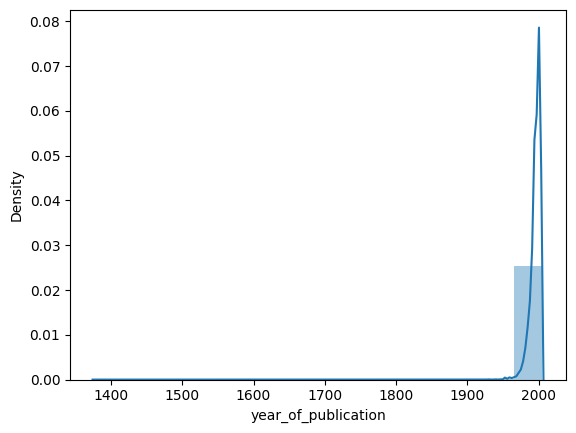

In [ ]:
sns.distplot(data[column], bins=16)

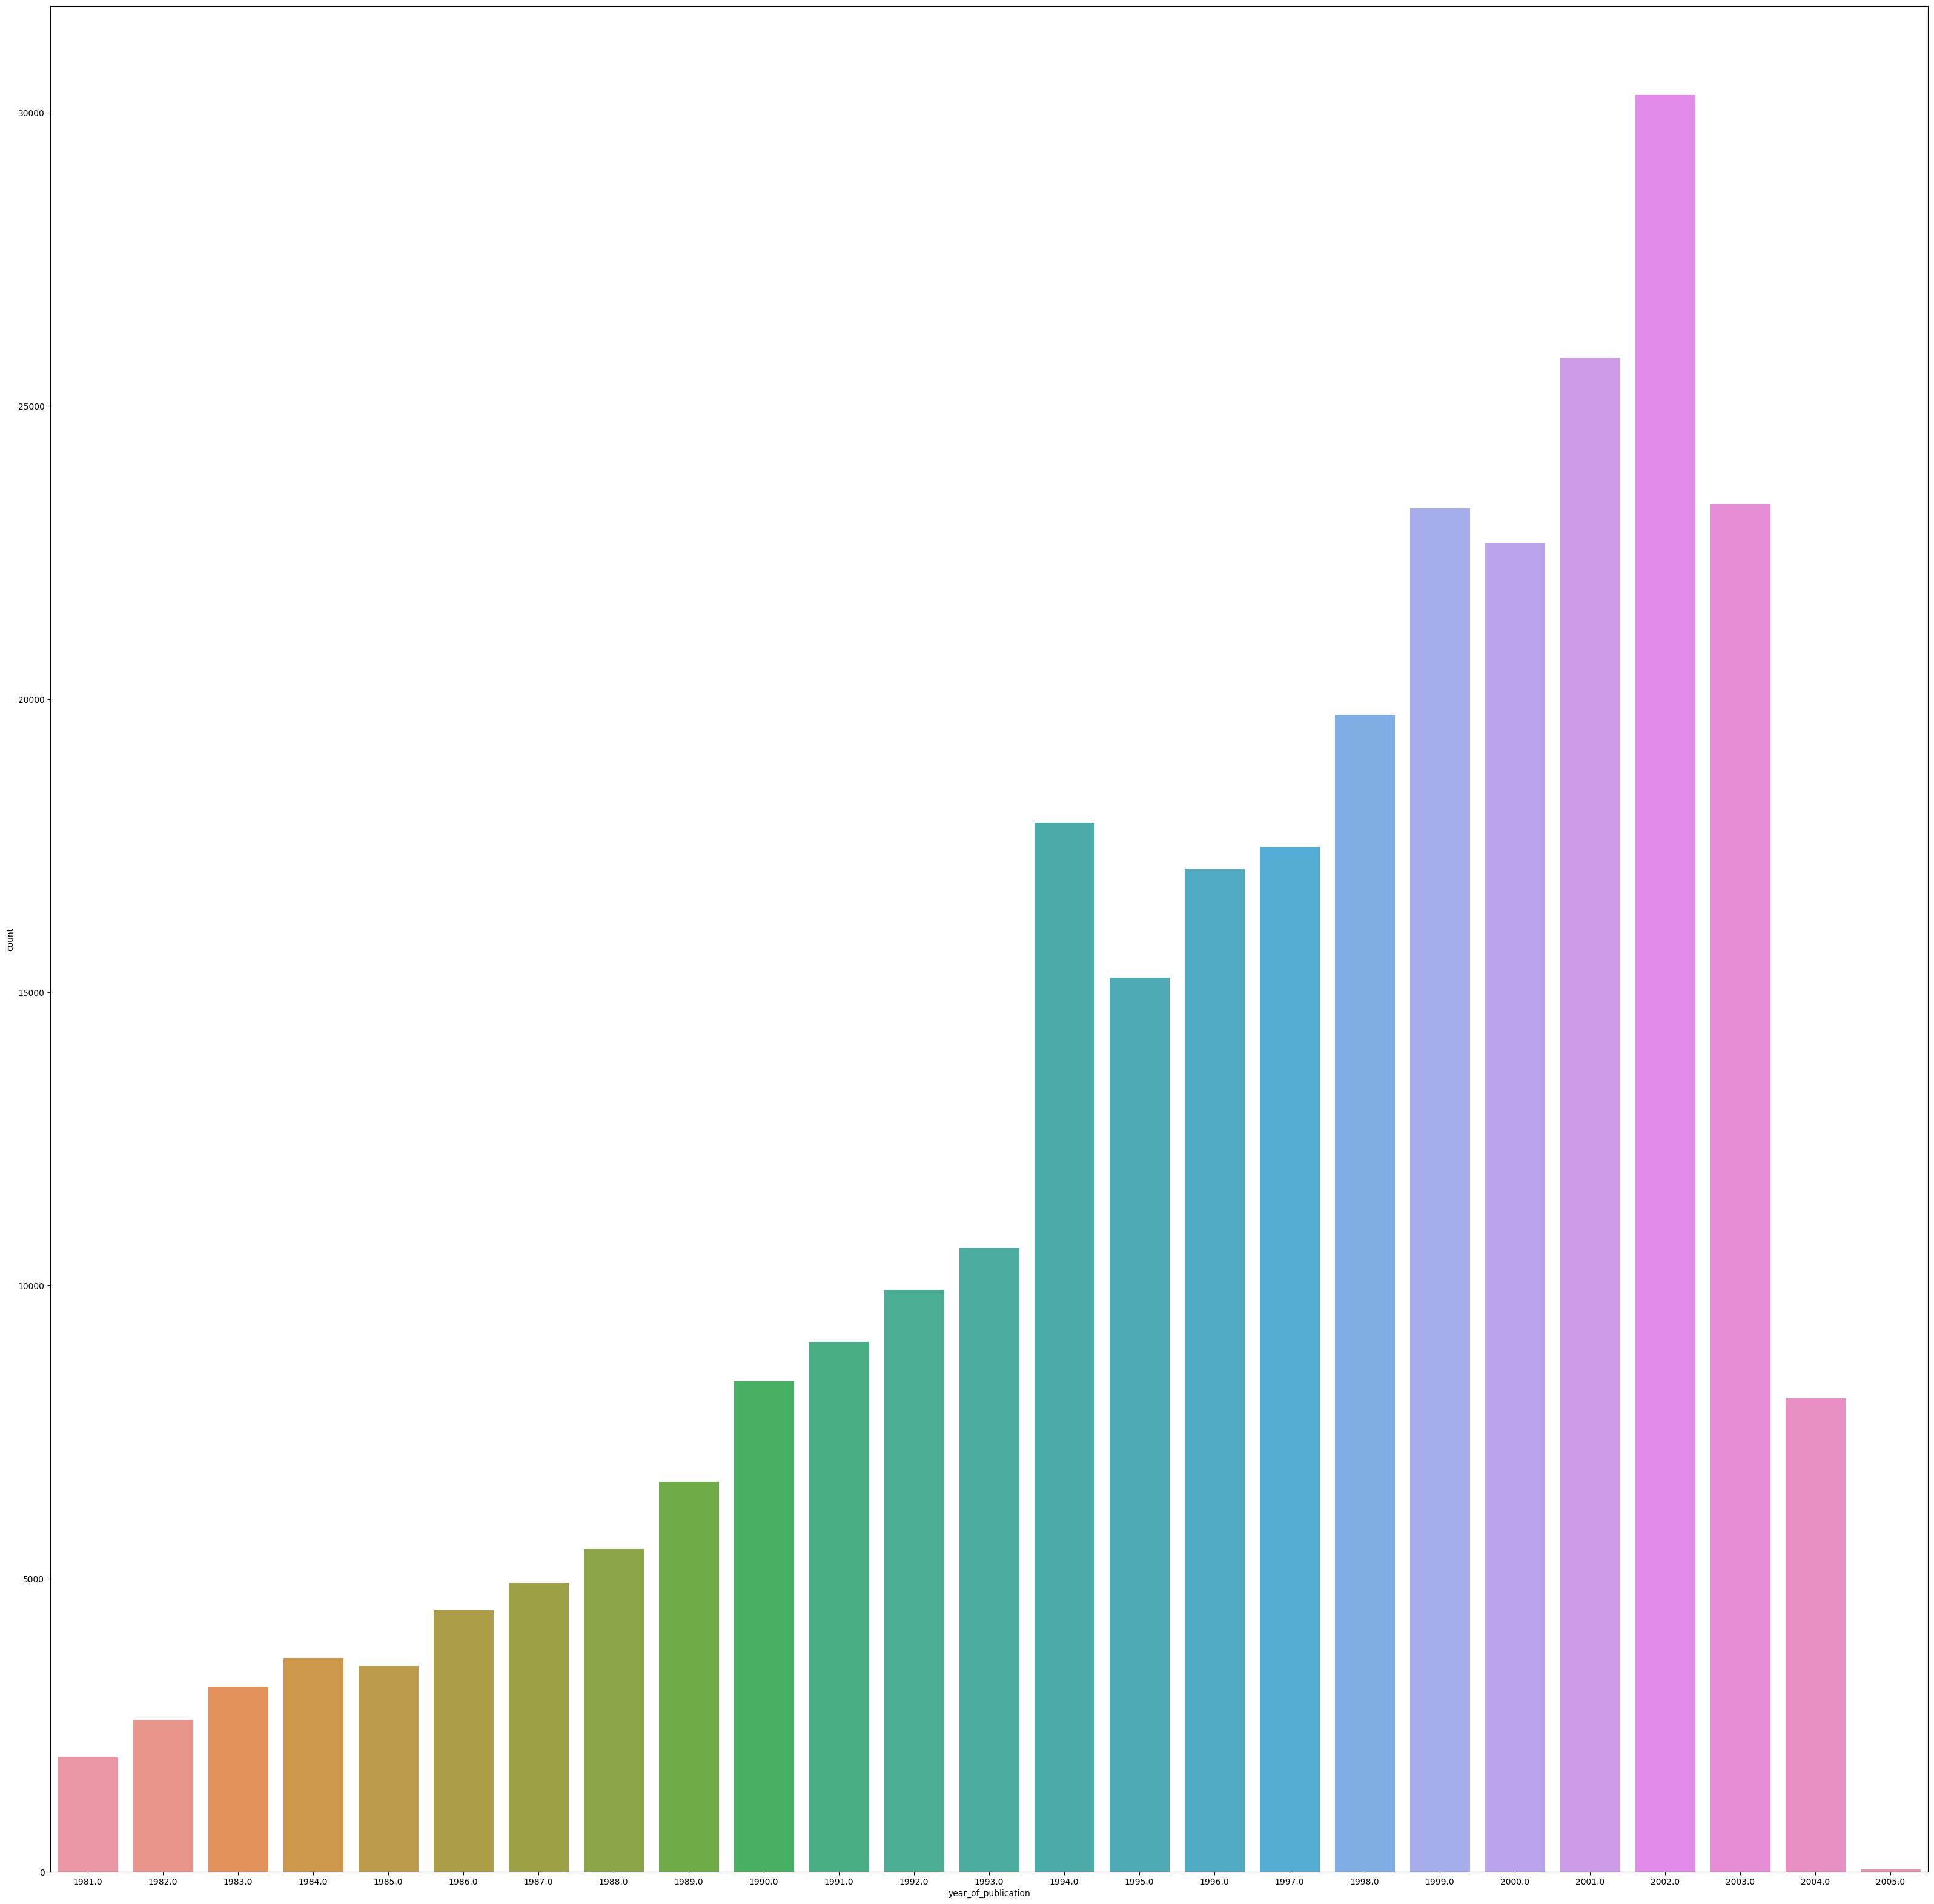

In [ ]:
plt.figure(figsize=(40, 40))
sns.countplot(x=column, data=data.loc[data[column] > 1980])
plt.show()

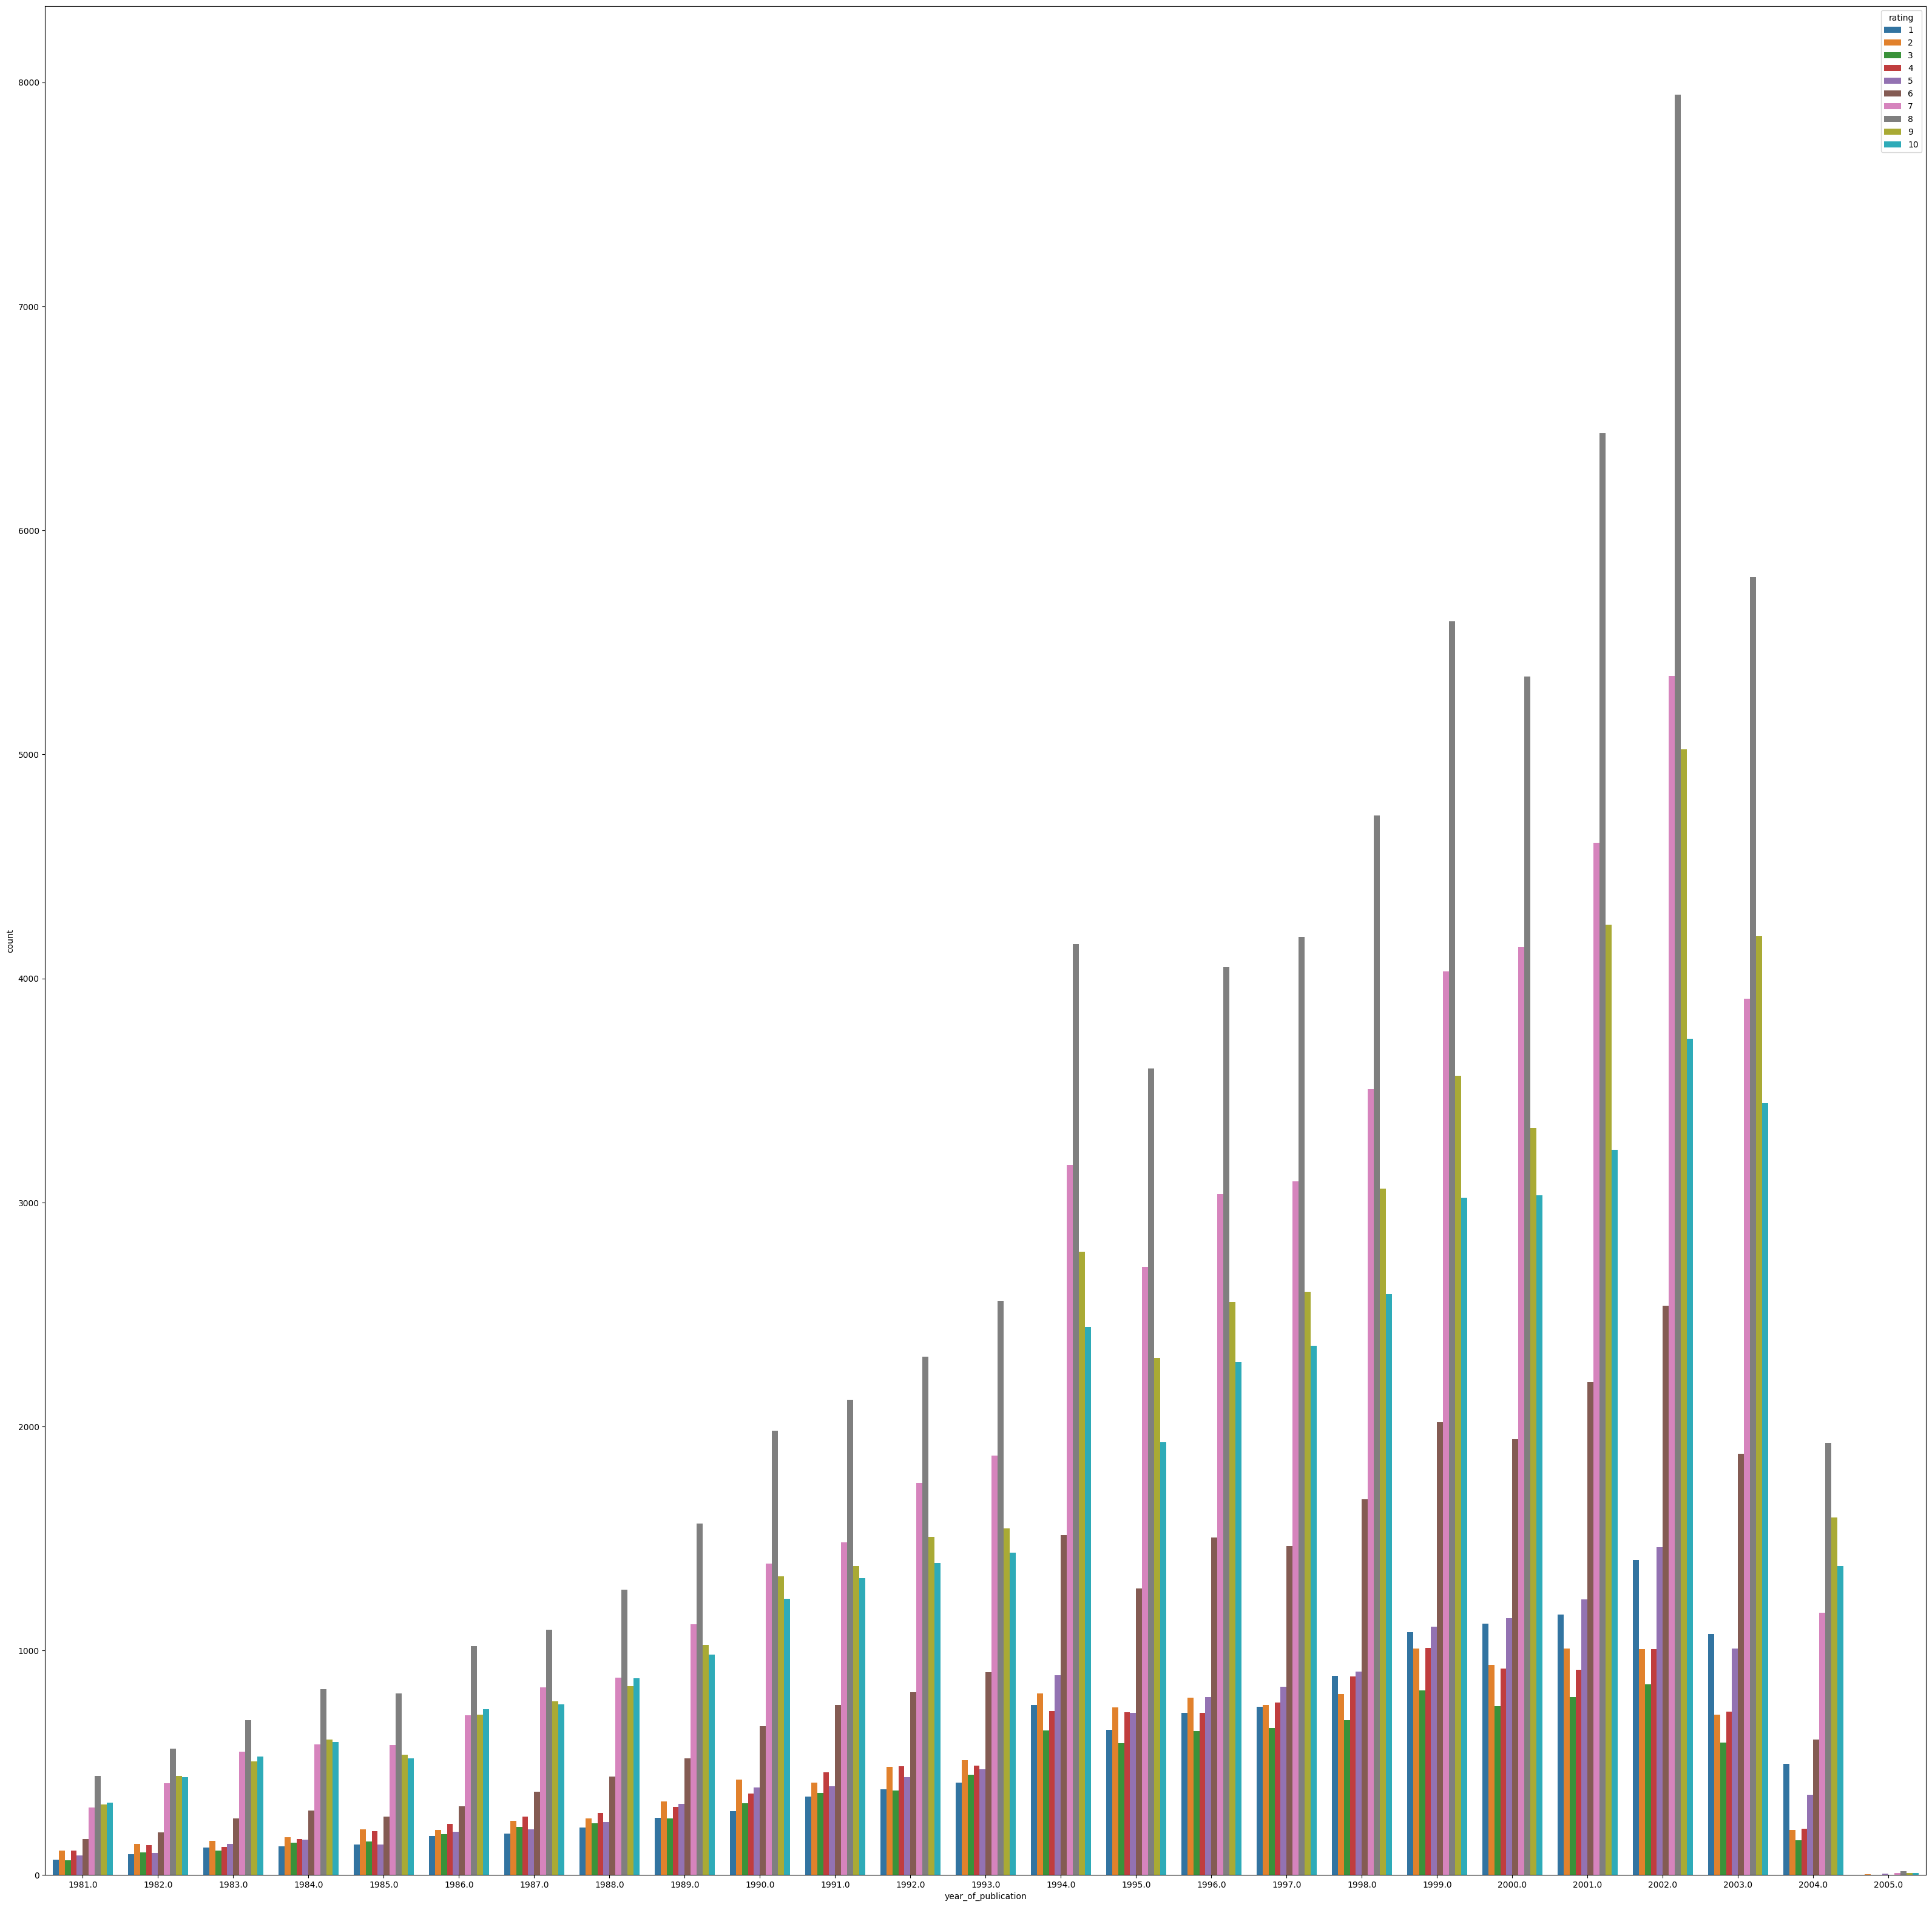

In [ ]:
# 8, 7, 9, 10, 6 순서로 rating이 많이 매겨지는 경향이 보임
# 나머지는 rating은 비슷하게 매겨지는 경향이 있음
# 6~10 사이를 맞추는 것에 조금 더 집중을 해도 좋을 것 같음
# 6~10을 맞추는 모델과 1~5를 맞추는 모델을 나눠서 돌려도 좋을 것 같음 
# --> 그러려면 1~5가 갖는 특징과 6~10이 갖는 특징을 찾아서 구분할 수 있는 피쳐를 만들어야함

plt.figure(figsize=(40, 40))
sns.countplot(x=column, data=data.loc[data[column] > 1980], hue="rating")
plt.show()

### publisher

In [ ]:
column = 'publisher'

In [ ]:
data[column].describe().to_frame()

,publisher
count,306795
unique,10408
top,Ballantine Books
freq,10227


In [ ]:
data[column] = data[column].apply(lambda x: x.lower())
data[column].describe().to_frame()

,publisher
count,306795
unique,10275
top,ballantine books
freq,10227


In [ ]:
# 겹치는 이름이 너무 많음
# 겹치는 이름을 하나로 통합해 줄 필요가 있음
# 10000개라 수작업으로 해도 좋을 듯
data[column].value_counts()
sorted(data[column].unique())

[' tri-state press',
 "'k' pub",
 '10-18',
 '10/18',
 '10/18 uge',
 '1001 nuits',
 '101 productions',
 '101 productions; [distributed by scribner, new york]',
 '11/9 publishing',
 '1stbooks library',
 '2 13 61',
 '2.13.61 publications',
 '219 press',
 '21st century information',
 '21st century publications',
 '22/7 publishing company',
 '22nd. century, new york',
 '29th street press',
 '2nd avenue publishing, inc.',
 '3',
 '300incredible.com',
 '37547',
 '3h productions, inc.',
 '3rd bed',
 '3rd woman press',
 '5 star publications',
 '[distributed by] fundacã£o oriente',
 '[published for] the crime club [by] collins',
 '\\corvina\\""',
 'a & b book dist inc',
 'a & b distributors',
 'a & c black (publishers) ltd',
 'a & w pub',
 'a & w visual library',
 'a different voice publishing co.',
 'a disney/bantam books',
 'a golden book',
 'a h m publications',
 'a j k publishing',
 'a k pr distribution',
 'a new hope pub',
 'a plume book',
 'a r hari',
 'a scholastic/madison prss book',
 'a 

### img_url

In [ ]:
column = 'img_url'

In [ ]:
data[column].describe().to_frame()

,img_url
count,306795
unique,129777
top,http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg
freq,566


In [ ]:
pd.set_option('display.max_colwidth', -1)
data[['img_url','isbn']]

/tmp/ipykernel_21228/2460350009.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,img_url,isbn
0,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,0002005018
1,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,074322678X
2,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,0887841740
3,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg,1552041778
4,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg,1567407781
...,...,...
306790,http://images.amazon.com/images/P/0446608831.01.THUMBZZZ.jpg,0446608831
306791,http://images.amazon.com/images/P/1550390961.01.THUMBZZZ.jpg,1550390961
306792,http://images.amazon.com/images/P/0375507299.01.THUMBZZZ.jpg,0375507299
306793,http://images.amazon.com/images/P/0345330293.01.THUMBZZZ.jpg,0345330293


In [ ]:
## img_url에서 P는 의미없는 것
## 'P'다음 오는 것은 해당 책의 isbn번호이며 isbn뒤에 오는 '01'도 의미 없음
## 이미지 학습시킬 경우에만 사용.
data[column].apply(lambda x: x.split('/')[4]).unique(), data[column].apply(lambda x: x.split('/')[5].split('.')[1]).unique()

(array(['P'], dtype=object), array(['01'], dtype=object))

### language

In [ ]:
column = 'language'

In [ ]:
data[column].describe().to_frame()

,language
count,187711
unique,24
top,en
freq,182282


In [ ]:
# language 결측값 119084개
# language 결측시 category, summary도 무조건 결측
# img_url을 통해 isbn 값을 얻을 수 있고 isbn값을 통해 language를 채울 수 있음

# data.loc[data[column].isna()]
# data.loc[data[column].isna() & data['category'].isna(), 'img_url'].isna().sum()
data.loc[data[column].isna() & data['category'].isna(), [column,'category','img_url']]

,language,category,img_url
2,NaN,NaN,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg
3,NaN,NaN,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg
4,NaN,NaN,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg
8,NaN,NaN,http://images.amazon.com/images/P/0316601950.01.THUMBZZZ.jpg
9,NaN,NaN,http://images.amazon.com/images/P/0316569321.01.THUMBZZZ.jpg
...,...,...,...
306782,NaN,NaN,http://images.amazon.com/images/P/1558747281.01.THUMBZZZ.jpg
306789,NaN,NaN,http://images.amazon.com/images/P/0060530103.01.THUMBZZZ.jpg
306790,NaN,NaN,http://images.amazon.com/images/P/0446608831.01.THUMBZZZ.jpg
306792,NaN,NaN,http://images.amazon.com/images/P/0375507299.01.THUMBZZZ.jpg


In [ ]:
tmp = data.loc[data[column].isna() & data['category'].isna(), [column,'category','img_url']]
len(tmp['img_url'].unique())

57627

In [ ]:
# 24개 언어 + nan 존재
data[column].unique(), len(data[column].unique())

(array(['en', nan, 'es', 'ru', 'fr', 'de', 'it', 'nl', 'da', 'ca', 'pt',
        'la', 'vi', 'no', 'eo', 'ko', 'zh-CN', 'ga', 'fa', 'ja', 'el',
        'ms', 'ro', 'zh-TW', 'gl'], dtype=object),
 25)

In [ ]:
## 대부분의 경우가 영어
data[column].value_counts().to_frame()

,language
en,182282
de,2226
es,1486
fr,1175
it,296
nl,81
pt,56
da,43
ca,23
ru,10


In [ ]:
startswith_B = sorted(data['isbn'].tolist())[-51:]
data.loc[data['isbn'].isin(startswith_B)].sort_values('year_of_publication')[['year_of_publication', 'isbn']]
data.loc[data['isbn'].isin(startswith_B)].sort_values('year_of_publication')['year_of_publication'].max()
data.loc[data['isbn'].isin(startswith_B)].sort_values('year_of_publication')['year_of_publication'].value_counts().to_frame()
## 전자책이냐 아니냐 ?!
## isbn이 적혀있지만 전자책인지 아닌지는 모르나 ?

,year_of_publication
1994.0,20
2001.0,11
2002.0,9
2000.0,4
1999.0,3
2003.0,2
1996.0,1
1997.0,1


In [ ]:
# 언어 다 확인하기
sorted(data.loc[data[column] == 'en', 'isbn'].tolist())

['0000913154',
 '0001055607',
 '0001061127',
 '0001714600',
 '0001856367',
 '0001981625',
 '0002005018',
 '0002005018',
 '0002005018',
 '0002005018',
 '0002005018',
 '0002005018',
 '0002005018',
 '0002005395',
 '0002006588',
 '0002006588',
 '0002118580',
 '0002163578',
 '0002179695',
 '0002187272',
 '0002192152',
 '0002197154',
 '0002198274',
 '0002199009',
 '0002200309',
 '0002210967',
 '0002211890',
 '0002211890',
 '0002222752',
 '0002224216',
 '000222674X',
 '0002233509',
 '0002237857',
 '0002239183',
 '0002239183',
 '0002239183',
 '0002240009',
 '0002240114',
 '0002240114',
 '0002240114',
 '0002241358',
 '0002243016',
 '0002243792',
 '0002245663',
 '000225056X',
 '0002250810',
 '0002251000',
 '0002251485',
 '0002251485',
 '0002251760',
 '0002251760',
 '0002251760',
 '0002251760',
 '0002251760',
 '0002251760',
 '0002251892',
 '0002252066',
 '0002252066',
 '0002253178',
 '0002253305',
 '0002253305',
 '0002253402',
 '0002255553',
 '000225669X',
 '0002256967',
 '0002258560',
 '00022585

In [ ]:
data.loc[~data['language'].isna()].language.unique()

In [ ]:
aaaa = data.loc[~data['language'].isna()]
aaaa.loc[aaaa['language'] == 'el']

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating,location,age,location_city,location_state,location_country,new_category
185690,1586649019,Popcorn Romance,Tomoko Taniguchi,2003.0,central park media,http://images.amazon.com/images/P/1586649019.01.THUMBZZZ.jpg,el,juvenile fiction,"When promising musician Zenta Yamazaki collapses on stage, he and his\nolder brother Ryouta retreat to their grandfather&#39;s farm, leaving\nRyouta&#39;s girlfriend behind without a good-bye.",images/1586649019.01.THUMBZZZ.jpg,33491,6,"waterloo, ontario, canada",NaN,waterloo,ontario,canada,73


In [ ]:
data['isbn']

0         0002005018
1         074322678X
2         0887841740
3         1552041778
4         1567407781
             ...    
306790    0446608831
306791    1550390961
306792    0375507299
306793    0345330293
306794    0670528951
Name: isbn, Length: 306795, dtype: object

In [ ]:
print(data.loc[~data['language'].isna()].language.unique())
# sns.countplot(x=column, data=data, hue='age')
for idx, lang in enumerate(data.loc[~data['language'].isna()].language.unique()):
    try:
        plt.subplot(7, 4, idx+1)
        sns.countplot(x=column, data=data.loc[data[column]==lang], hue='age')
    except:
        pass
plt.show()

In [ ]:
pd.crosstab(data[column], data['rating'], normalize='index') * 100

rating,1,2,3,4,5,6,7,8,9,10
language,,,,,,,,,,
ca,8.695652,0.000000,0.000000,4.347826,21.739130,13.043478,30.434783,13.043478,4.347826,4.347826
da,2.325581,0.000000,0.000000,4.651163,0.000000,18.604651,9.302326,32.558140,16.279070,16.279070
de,9.838275,3.818509,3.054807,3.863432,5.345912,8.849955,16.711590,21.293801,15.229111,11.994609
el,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
en,4.251105,4.208315,3.378831,4.111761,4.542412,8.193349,17.092198,24.017731,16.047662,14.156636
eo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
es,3.835801,3.835801,2.826380,4.172275,5.989233,12.113055,19.650067,22.880215,15.074024,9.623149
fa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
fr,5.531915,2.297872,1.702128,2.297872,5.276596,10.127660,19.659574,26.212766,15.829787,11.063830


### category

In [ ]:
column = 'category'

In [ ]:
data[column].describe().to_frame()

,category
count,185574
unique,3872
top,['Fiction']
freq,108569


In [ ]:
## unique값이 3844개 존재, 하지만 publisher와 마찬가지로 부분 중복이 있음
## 카테고리를 더 크게 묶어주는 것도 가능
## 3844개라 publisher보다 훨씬 수월
## 수작업 가능, 예상 소요시간 : 0.5~1시간
import re
data.loc[~data[column].isna(), column] = data.loc[~data[column].isna(), column].apply(lambda x : re.sub("[\'\[\]]","",x).lower())
data[column].describe().to_frame()

,category
count,185574
unique,3844
top,fiction
freq,108998


### summary

In [ ]:
column = 'summary'

In [ ]:
data[column].describe().to_frame()

,summary
count,187711
unique,70061
top,"Wild animus is a search for the primordial, a test of human\nfoundations and a journey to the breaking point."
freq,465


In [ ]:
summary_len = data.loc[~data[column].isna(),column].apply(lambda x: len(x))
summary_vc = summary_len.value_counts()
summary_vc

244    4163
243    3523
241    3393
242    3327
240    3277
       ... 
4      1   
5      1   
294    1   
329    1   
291    1   
Name: summary, Length: 305, dtype: int64

<BarContainer object of 305 artists>

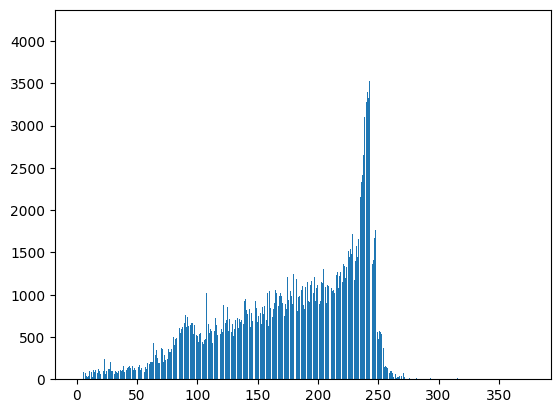

In [ ]:
plt.bar(summary_vc.index, summary_vc.values)

### age

In [ ]:
column = 'age'

In [ ]:
data[column].describe().to_frame()

,age
count,214133.000000
mean,36.662462
std,12.282089
min,5.000000
25%,28.000000
50%,35.000000
75%,45.000000
max,99.000000


In [ ]:
tmp = data.loc[~data[column].isna(), column].apply(lambda x: int(x)).to_frame()
tmp

,age
7,30
8,30
9,30
10,30
11,30
...,...
306789,54
306790,54
306791,74
306793,33


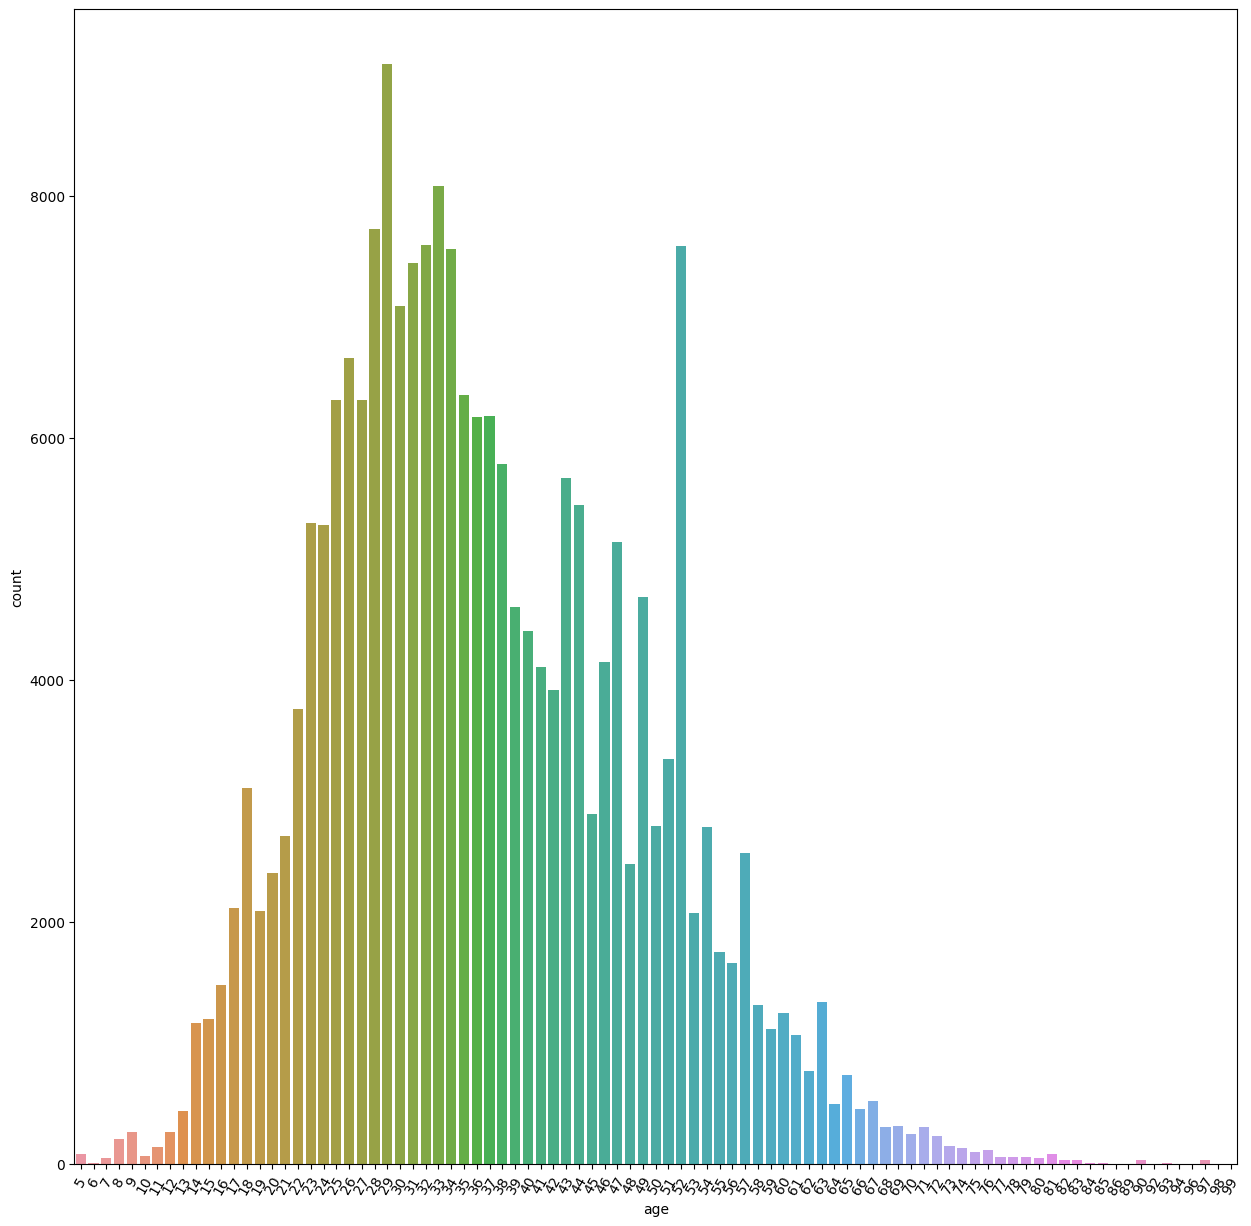

In [ ]:
# 나름 정규분포스러운 모습을 나타냄
# 하지만 52세에서 갑자기 값이 튐 -> 왜인지는 알지 못할 것 같다..
plt.figure(figsize=(15, 15))
sns.countplot(x=column, data=tmp)
plt.xticks(rotation=60)
plt.show()

### location

In [ ]:
column = 'location'

In [ ]:
data[column].describe().to_frame()

,location
count,306795
unique,16831
top,"n/a, n/a, n/a"
freq,5525


### location_city

In [ ]:
column = 'location_city'

In [ ]:
data[column].describe().to_frame()

,location_city
count,306795
unique,11374
top,n/a
freq,6749


In [ ]:
data.loc[~data[column].isna(), column].to_frame()

,location_city
0,timmins
1,timmins
2,timmins
3,timmins
4,timmins
...,...
306790,stratford
306791,victoria
306792,irvington
306793,vancouver


### location_state

### location_country

### 이변량분석

In [ ]:
# data.drop(["img_url", "img_path", "summary", "location", "book_title"], axis=1, inplace=True)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# categorical = ["isbn", "book_author", "year_of_publication", "publisher", "language", "category", "user_id", "age", "location_city", "location_state", "location_country"]
# for c in categorical:
#     le = LabelEncoder()
#     data[c] = le.fit_transform(data[c])

In [ ]:
def get_chi2(data, target, column):
    table = pd.crosstab(data[target], data[column])
    result = spst.chi2_contingency(table)
    return result

def get_stacked_bar(data, target, column):
    plt.figure(figsize=(10,15))
    table = pd.crosstab(data[column], data[target], normalize = 'index')
    table.plot.bar(stacked=True)
    plt.axhline(data[target].mean() / 10, color = 'r')
    plt.show()
    return

In [ ]:
get_chi2(data, "rating", "year_of_publication")

(3139.949452505948,
 7.14673814652593e-268,
 819,
 array([[4.31851888e-02, 4.31851888e-02, 4.31851888e-02, 1.72740755e-01,
         8.63703776e-02, 4.31851888e-02, 4.31851888e-02, 1.29555566e-01,
         2.15925944e-01, 1.29555566e+00, 5.61407454e-01, 4.31851888e-02,
         1.29555566e-01, 8.63703776e-02, 2.59111133e-01, 8.63703776e-02,
         4.31851888e-01, 1.12281491e+00, 8.63703776e-02, 2.15925944e-01,
         4.31851888e-02, 8.63703776e-02, 3.02296322e-01, 1.72740755e-01,
         4.31851888e-01, 2.15925944e-01, 7.77333399e-01, 1.72740755e-01,
         5.61407454e-01, 2.59111133e-01, 8.63703776e-02, 3.88666699e-01,
         8.63703776e-01, 4.31851888e-01, 4.31851888e-01, 5.18222266e-01,
         7.77333399e-01, 1.29555566e+00, 1.59785199e+00, 8.46429701e+00,
         3.02296322e+00, 2.80703727e+00, 2.02970387e+00, 3.92985218e+00,
         3.02296322e+00, 7.55740804e+00, 5.35496341e+00, 4.75037077e+00,
         4.10259294e+00, 4.79355596e+00, 5.18222266e+00, 7.98925993e+00,
 

In [ ]:
tmp = data.loc[data['year_of_publication'] >= 1980]
tmp

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating,location,age,location_city,location_state,location_country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,harperflamingo canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,en,actresses,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",images/0002005018.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN,timmins,ontario,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,en,fiction,"Now back in print, Ann Beattie&#39;s finest short story collection,\nreissued to accompany the publication of her latest novel, &quot;The\nDoctor&#39;s House.",images/074322678X.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN,timmins,ontario,canada
2,0887841740,The Middle Stories,Sheila Heti,2004.0,house of anansi press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN,timmins,ontario,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,mira books,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,brilliance audio - trade,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg,8,6,"timmins, ontario, canada",NaN,timmins,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306790,0446608831,Texas Crime Chronicles,Texas Monthly,2000.0,warner books,http://images.amazon.com/images/P/0446608831.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0446608831.01.THUMBZZZ.jpg,278411,8,"stratford, texas, usa",54.0,stratford,texas,usa
306791,1550390961,"Gilean Douglas: Writing Nature, Finding Home",Andrea Pinto Lebowitz,1999.0,sono nis press,http://images.amazon.com/images/P/1550390961.01.THUMBZZZ.jpg,en,"authors, canadian (english) 20th century biography",Her writings span almost the entire twentieth century. This book both\nan intriguing biography and a collection of Douglas&#39;s best\nwriting.,images/1550390961.01.THUMBZZZ.jpg,278621,8,"victoria, delaware, canada",74.0,victoria,delaware,canada
306792,0375507299,The Snow Geese: A Story of Home,William Fiennes,2002.0,random house,http://images.amazon.com/images/P/0375507299.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0375507299.01.THUMBZZZ.jpg,278636,2,"irvington, alabama, usa",NaN,irvington,alabama,usa
306793,0345330293,Town Like Alice,Nevil Shute,1981.0,ballantine books,http://images.amazon.com/images/P/0345330293.01.THUMBZZZ.jpg,NaN,NaN,NaN,images/0345330293.01.THUMBZZZ.jpg,278659,10,"vancouver, washington, usa",33.0,vancouver,washington,usa


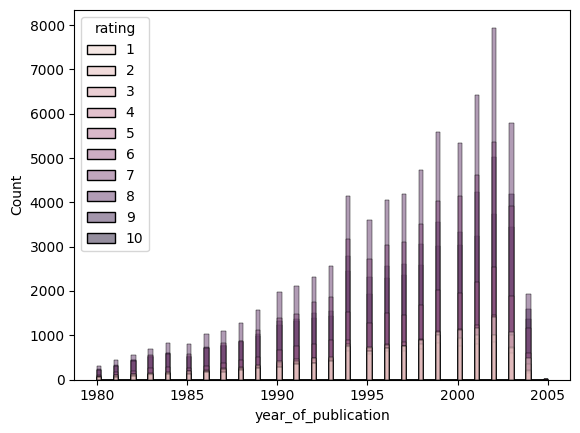

In [ ]:
sns.histplot(x='year_of_publication', data = tmp, hue = 'rating')
plt.show()

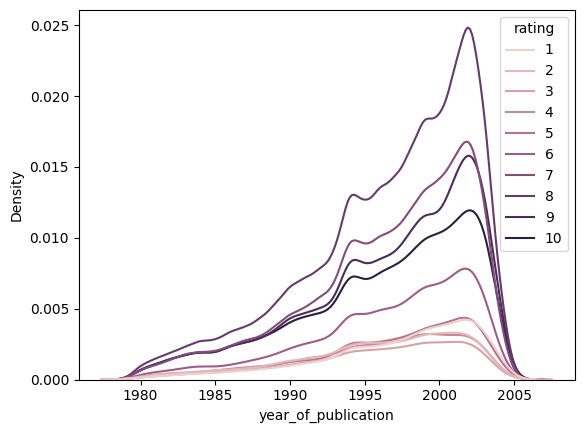

In [ ]:
sns.kdeplot(x='year_of_publication', data = tmp, hue ='rating')
plt.show()

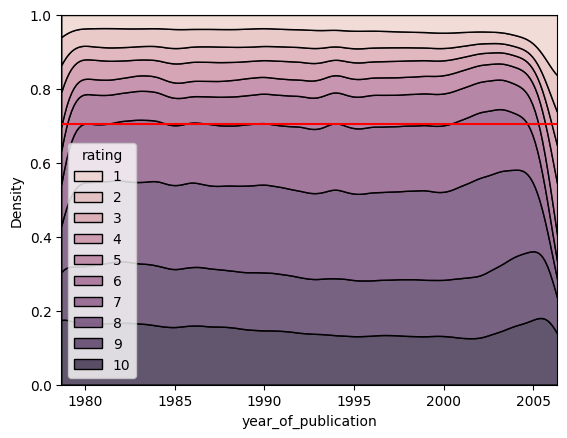

In [ ]:
sns.kdeplot(x='year_of_publication', data = tmp, hue ='rating', multiple = 'fill')
plt.axhline(tmp['rating'].mean() / 10, color = 'r')
plt.show()

In [ ]:
aa  = data['year_of_publication'].value_counts().sort_index()
aa.values[-26:]


array([ 1416,  1962,  2592,  3160,  3640,  3512,  4456,  4925,  5507,
        6655,  8370,  9033,  9929, 10643, 17888, 15249, 17102, 17475,
       19734, 23255, 22669, 25818, 30311, 23326,  8073,    42])

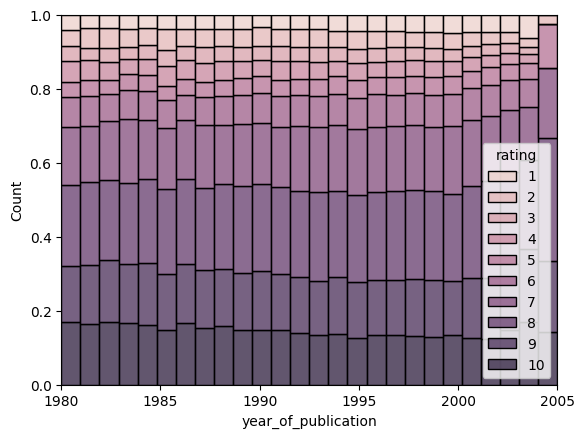

In [ ]:
sns.histplot(x='year_of_publication', data = tmp, hue = 'rating', bins = 26, multiple = 'fill')
# plt.axhline(tmp['rating'].mean() / 10, color = 'r')
plt.show()

In [ ]:
ttt = data.loc[data['year_of_publication'] >= 1980]
# ttt
get_chi2(ttt, "rating", "year_of_publication")

(1947.7103446624235,
 1.1470270221918862e-271,
 225,
 array([[6.17044301e+01, 8.54972400e+01, 1.12950482e+02, 1.37701977e+02,
         1.58618733e+02, 1.53040931e+02, 1.94177218e+02, 2.14614632e+02,
         2.39976198e+02, 2.90002106e+02, 3.64735932e+02, 3.93627201e+02,
         4.32671813e+02, 4.63785487e+02, 7.79497772e+02, 6.64499191e+02,
         7.45246585e+02, 7.61500647e+02, 8.59940130e+02, 1.01337325e+03,
         9.87837377e+02, 1.12506001e+03, 1.32084956e+03, 1.01646719e+03,
         3.51793689e+02, 1.83021615e+00],
        [5.93996401e+01, 8.23037386e+01, 1.08731545e+02, 1.32558519e+02,
         1.52693990e+02, 1.47324531e+02, 1.86924291e+02, 2.06598324e+02,
         2.31012583e+02, 2.79169919e+02, 3.51112279e+02, 3.78924399e+02,
         4.16510612e+02, 4.46462125e+02, 7.50381894e+02, 6.39678751e+02,
         7.17410060e+02, 7.33056999e+02, 8.27819560e+02, 9.75521632e+02,
         9.50939577e+02, 1.08303666e+03, 1.27151306e+03, 9.78500003e+02,
         3.38653457e+02, 1.76

<Figure size 1000x1500 with 0 Axes>

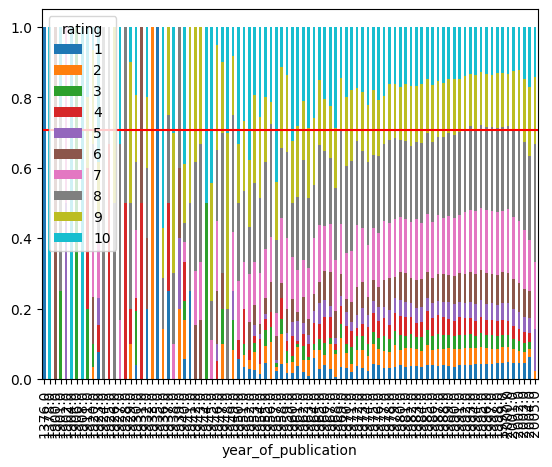

In [ ]:
get_stacked_bar(data, "rating", "year_of_publication")

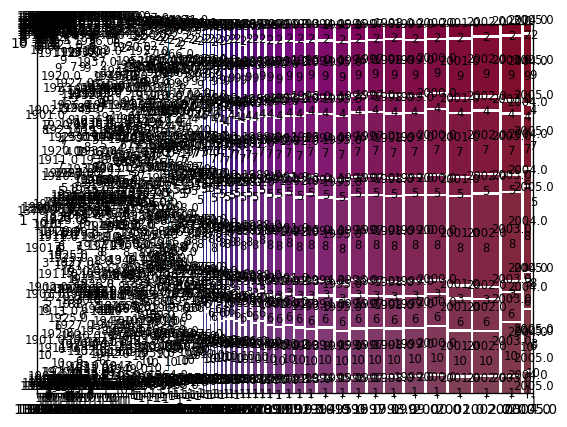

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
# 저장된 값 순서대로 보여집니다. 
mosaic(data.sort_values(['year_of_publication', 'rating']), [ 'year_of_publication','rating'], gap = 0.01,)
# plt.axhline(data['rating'].mean() / 10, color = 'r')
plt.show()

year_of_publication에서 year에 따라 rating의 분포가 크게 다르지 않은 것을 확인할 수 있음. <br>
이 말은 year_of_publication은 rating에 큰 영향을 주지 않을 것으로 생각할 수 있음

## Clustering

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import normalize
import matplotlib.cm as cm
import math

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(clustering, X_features, cluster_lists=[1]): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        if clustering[0] == 'hierarchical':
            model = AgglomerativeClustering(n_clusters=n_cluster, linkage=clustering[1])
        elif clustering[0] == 'kmeans':
            model = KMeans(n_clusters=n_cluster)
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        cluster_labels = model.fit_predict(X_features)
        
        #if clustering[0] == 'dbscan':
        #    n_cluster = len(set(cluster_labels))-1
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([-1, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
# docs = data['book_title']
# vectorizer = TfidfVectorizer(min_df=10)
# X = vectorizer.fit_transform(docs)
# # L2 normalizing
# X = normalize(X, norm="l2")
# params = {'n_clusters':[2, 3, 4, 5, 6, 7]}

# scores_kmeans = {}
# for n_cluster in params['n_clusters']:
#     model = KMeans(n_clusters=n_cluster)
#     model.fit(X)
#     score = silhouette_score(X, model.labels_)
#     print(n_cluster)
#     scores_kmeans['_'.join(['scaled', str(n_cluster)])] = score

# pd.Series(scores_kmeans).sort_values(ascending=False)[:10]

In [ ]:
## summary 결측치 book_title로 바꾸기
data.loc[data['summary'].isna(), "summary"] = data.loc[data['summary'].isna(), "book_title"]

In [429]:
from scipy.sparse import hstack

docs = data['book_title']
docs2 = data['summary']
vectorizer = TfidfVectorizer(max_df=0.75)
X = vectorizer.fit_transform(docs)

vectorizer = TfidfVectorizer(max_df=0.75)
X2 = vectorizer.fit_transform(docs2)

# L2 normalizing
X = normalize(X, norm="l2")
X2 = normalize(X2, norm="l2")
new = hstack((X, X2))
# scores_kmeans = {}

model = KMeans(n_clusters=50)
model.fit(new)
# # score_samples = silhouette_samples(X, model.labels_)
# # print(score_samples.shape)
# # score_samples
# # score = silhouette_score(X, model.labels_)

# # scores_kmeans['_'.join(['scaled', str(n_cluster)])] = score
# # pd.Series(scores_kmeans).sort_values(ascending=False)[:10]
model.labels_

In [418]:
# data["new_category"] = model.labels_ # 200
# data["new_category2"] = model.labels_ # 500
data["new_category3"] = model.labels_ # 50

In [425]:
data.loc[data["new_category2"] == 455, ["book_title", "summary", "category", "new_category2"]][-20:]
# data.loc[data["new_category"] == 0, "category"].unique()

,book_title,summary,category,new_category2
249813,The Rapture of Canaan,"Ninah Huff, the teenage granddaughter of the founder of an isolated\nreligious community, causes controversy when she is discovered to be\npregnant with what she claims is a holy child",fiction,455
249814,The Rapture of Canaan,"Ninah Huff, the teenage granddaughter of the founder of an isolated\nreligious community, causes controversy when she is discovered to be\npregnant with what she claims is a holy child",fiction,455
249815,The Rapture of Canaan,"Ninah Huff, the teenage granddaughter of the founder of an isolated\nreligious community, causes controversy when she is discovered to be\npregnant with what she claims is a holy child",fiction,455
249816,The Rapture of Canaan,"Ninah Huff, the teenage granddaughter of the founder of an isolated\nreligious community, causes controversy when she is discovered to be\npregnant with what she claims is a holy child",fiction,455
249817,The Rapture of Canaan,"Ninah Huff, the teenage granddaughter of the founder of an isolated\nreligious community, causes controversy when she is discovered to be\npregnant with what she claims is a holy child",fiction,455
249821,The Rapture of Canaan,"Ninah Huff, the teenage granddaughter of the founder of an isolated\nreligious community, causes controversy when she is discovered to be\npregnant with what she claims is a holy child",fiction,455
249823,The Rapture of Canaan,"Ninah Huff, the teenage granddaughter of the founder of an isolated\nreligious community, causes controversy when she is discovered to be\npregnant with what she claims is a holy child",fiction,455
249824,The Rapture of Canaan,"Ninah Huff, the teenage granddaughter of the founder of an isolated\nreligious community, causes controversy when she is discovered to be\npregnant with what she claims is a holy child",fiction,455
249827,The Rapture of Canaan,"Ninah Huff, the teenage granddaughter of the founder of an isolated\nreligious community, causes controversy when she is discovered to be\npregnant with what she claims is a holy child",fiction,455
249828,The Rapture of Canaan,"Ninah Huff, the teenage granddaughter of the founder of an isolated\nreligious community, causes controversy when she is discovered to be\npregnant with what she claims is a holy child",fiction,455


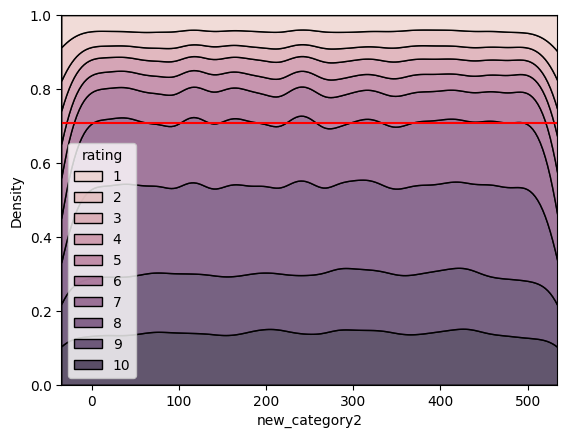

In [427]:
sns.kdeplot(x='new_category2', data = data, hue ='rating', multiple = 'fill')
plt.axhline(data['rating'].mean() / 10, color = 'r')
plt.show()

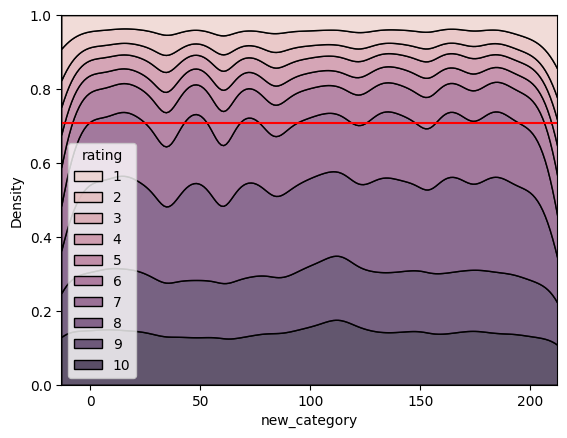

In [428]:
sns.kdeplot(x='new_category', data = data, hue ='rating', multiple = 'fill')
plt.axhline(data['rating'].mean() / 10, color = 'r')
plt.show()

<Figure size 1000x1500 with 0 Axes>

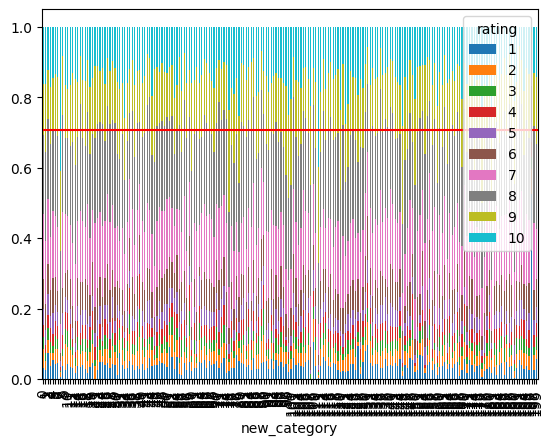

In [260]:
get_stacked_bar(data, "rating", "new_category")

In [252]:
for i in range(0, 200):
    print(len(data.loc[data["new_category"] == i, "book_title"]))

1468
721
1863
1263
370
5918
918
391
271
273
1202
1907
684
837
4314
1401
16164
699
235
706
2234
54
438
1200
350
9223
2560
551
884
743
336
227
944
216
800
2226
1115
735
2494
1230
1154
443
158
319
1078
277
691
37679
2768
26001
1238
2037
277
1391
145
270
597
578
345
2561
181
1253
157
82
1259
4827
750
1325
1203
3728
626
277
10199
1234
634
415
1995
889
1029
654
214
911
241
664
310
248
339
628
1007
2533
338
474
2505
621
216
907
2284
716
307
677
276
520
1649
427
2329
486
506
955
76
171
614
919
2277
291
240
549
261
218
952
646
461
319
963
457
144
2351
905
253
150
678
1236
463
661
1230
19078
524
166
1073
343
835
2108
984
1760
6839
467
257
592
3244
222
443
326
612
264
806
122
319
321
200
897
618
1756
1435
1528
728
5416
644
751
730
244
1319
413
298
509
1231
144
594
1381
170
537
483
354
374
1085
175
1616
7383
184
711
207
353
256
636
204
170
1675
956
339
465
1831
428


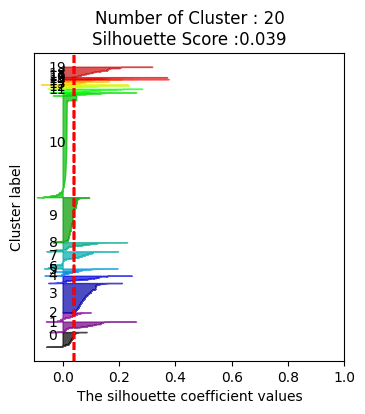

In [73]:
fig, axs = plt.subplots(figsize=(4*1, 4), nrows=1, ncols=1)
y_lower = 10
axs.set_title('Number of Cluster : '+ str(20)+'\n' \
                    'Silhouette Score :' + str(round(score_samples.mean(),3)) )
axs.set_xlabel("The silhouette coefficient values")
axs.set_ylabel("Cluster label")
axs.set_xlim([-0.1, 1])
# axs.set_ylim([-1, len(X) + 210])
axs.set_yticks([])  # Clear the yaxis labels / ticks
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

for i in range(20):
    ith_cluster_sil_values = score_samples[model.labels_==i]
    ith_cluster_sil_values.sort()

    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 20)
    axs.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
    axs.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
            
    axs.axvline(x=score_samples.mean(), color="red", linestyle="--")


In [ ]:
visualize_silhouette(['kmeans'], X, [3, 4, 5, 6, 7, 8])

In [64]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.preprocessing import normalize
# from sklearn.cluster import KMeans

# docs = data['book_title']
# k=20

# # vectorizing
# vectorizer = CountVectorizer(min_df=10)
# X = vectorizer.fit_transform(docs)

# # L2 normalizing
# X = normalize(X, norm="l2")

# # training k-means
# kmeans = KMeans(n_clusters=k).fit(X)

# # trained labels and cluster centers
# labels = kmeans.labels_
# centers = kmeans.cluster_centers_

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

sse = {}
for k in range(1,41):
  print(k)
  kmeans = KMeans(n_clusters = k, random_state=1)
  kmeans.fit(X)
  sse[k] = kmeans.inertia_
print(sse)

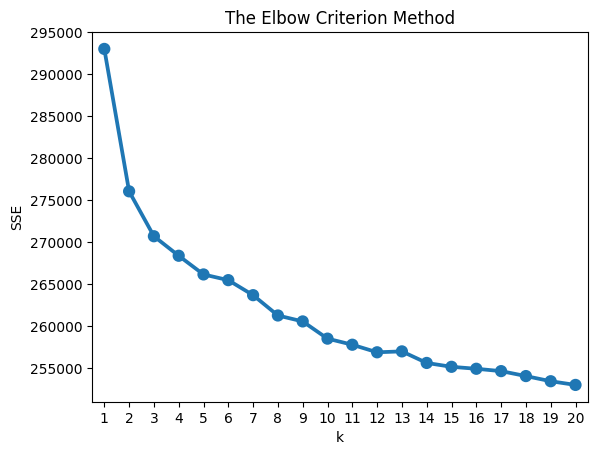

In [11]:
# sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
# plt.title("The Elbow Criterion Method")
# plt.xlabel("k")
# plt.ylabel("SSE")
# plt.show()
